# Data Understanding

## Importing python modules

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

## Load Data in a Dataframe using pandas

In [ ]:
df=pd.read_csv("drive/MyDrive/Dataset/train.csv")
df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [ ]:
df.iloc[552]

state                                       ND
account_length                             147
area_code                        area_code_408
international_plan                          no
voice_mail_plan                             no
number_vmail_messages                        0
total_day_minutes                        205.3
total_day_calls                             95
total_day_charge                          34.9
total_eve_minutes                        166.7
total_eve_calls                            128
total_eve_charge                         14.17
total_night_minutes                      240.6
total_night_calls                           84
total_night_charge                       10.83
total_intl_minutes                         7.8
total_intl_calls                             4
total_intl_charge                         2.11
number_customer_service_calls                1
churn                                       no
Name: 552, dtype: object

## Variable Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

## Count the number of missing values in each column

In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df.shape

(4250, 20)

## See how many unique entries there are

In [ ]:
print('State : ',df.state.unique())
print('Account Length : ',df.account_length.unique())
print('Area Code : ',df.area_code.unique())
print('International Plan : ',df.international_plan.unique())
print('Voice Mail Plan : ',df.voice_mail_plan.unique())
print('Number Vmail Messages : ',df.number_vmail_messages.unique())
print('Total Day Minutes : ',df.total_day_minutes.unique())
print('Total Day Calls : ',df.total_day_calls.unique())
print('Total Day Charge : ',df.total_day_charge.unique())
print('Total Eve Minutes : ',df.total_eve_minutes.unique())
print('Total Eve Calls : ',df.total_eve_calls.unique())
print('Total Eve Charge : ',df.total_eve_charge.unique())
print('Total Night Minutes : ',df.total_night_minutes.unique())
print('Total Night Calls : ',df.total_night_calls.unique())
print('Total Night Charge : ',df.total_night_charge.unique())
print('Total Intl Minutes : ',df.total_intl_minutes.unique())
print('Total Intl Calls : ',df.total_intl_calls.unique())
print('Total Intl Charge : ',df.total_intl_charge.unique())
print('Number Customer Service Calls : ',df.number_customer_service_calls.unique())
print('Churn : ',df.churn.unique())

State :  ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
Account Length :  [107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42  23   1 200   5

## Detecting Outliers

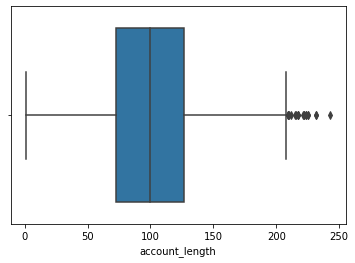

In [ ]:
sns.boxplot(x=df['account_length'])

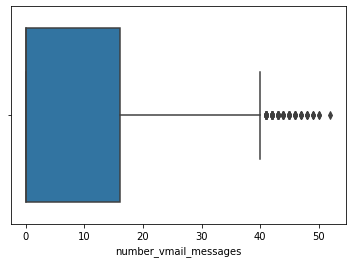

In [ ]:
sns.boxplot(x=df['number_vmail_messages'])

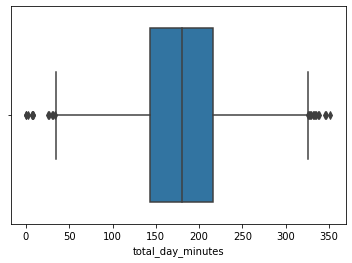

In [ ]:
sns.boxplot(x=df['total_day_minutes'])

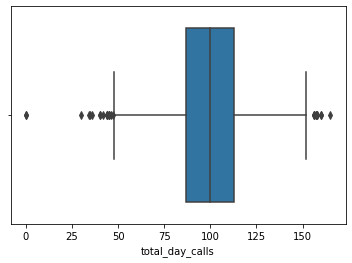

In [ ]:
sns.boxplot(x=df['total_day_calls'])

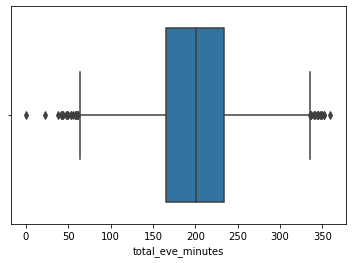

In [ ]:
sns.boxplot(x=df['total_eve_minutes'])

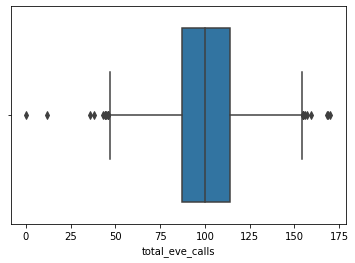

In [ ]:
sns.boxplot(x=df['total_eve_calls'])

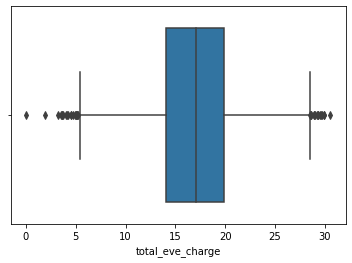

In [ ]:
sns.boxplot(x=df['total_eve_charge'])

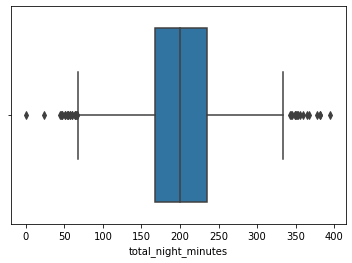

In [ ]:
sns.boxplot(x=df['total_night_minutes'])

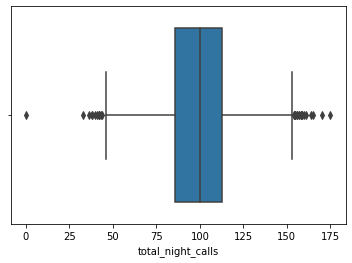

In [ ]:
sns.boxplot(x=df['total_night_calls'])

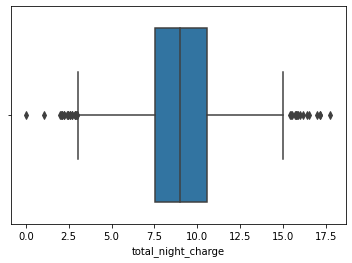

In [ ]:
sns.boxplot(x=df['total_night_charge'])

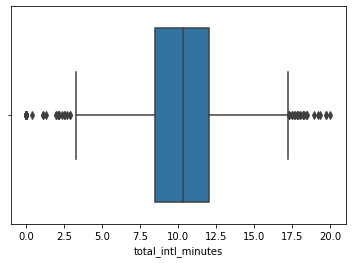

In [ ]:
sns.boxplot(x=df['total_intl_minutes'])

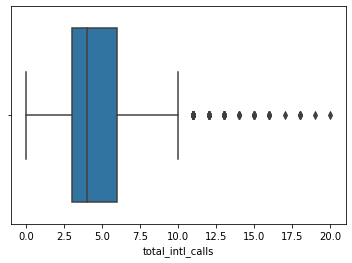

In [ ]:
sns.boxplot(x=df['total_intl_calls'])

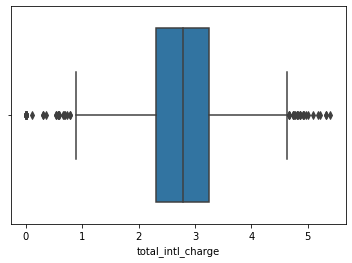

In [ ]:
sns.boxplot(x=df['total_intl_charge'])

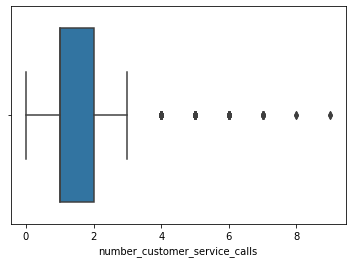

In [ ]:
sns.boxplot(x=df['number_customer_service_calls'])

## Remove outliers in all variables

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
data=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

<ipython-input-72-c954a2818c7b>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(4250, 20)

## Data visualization

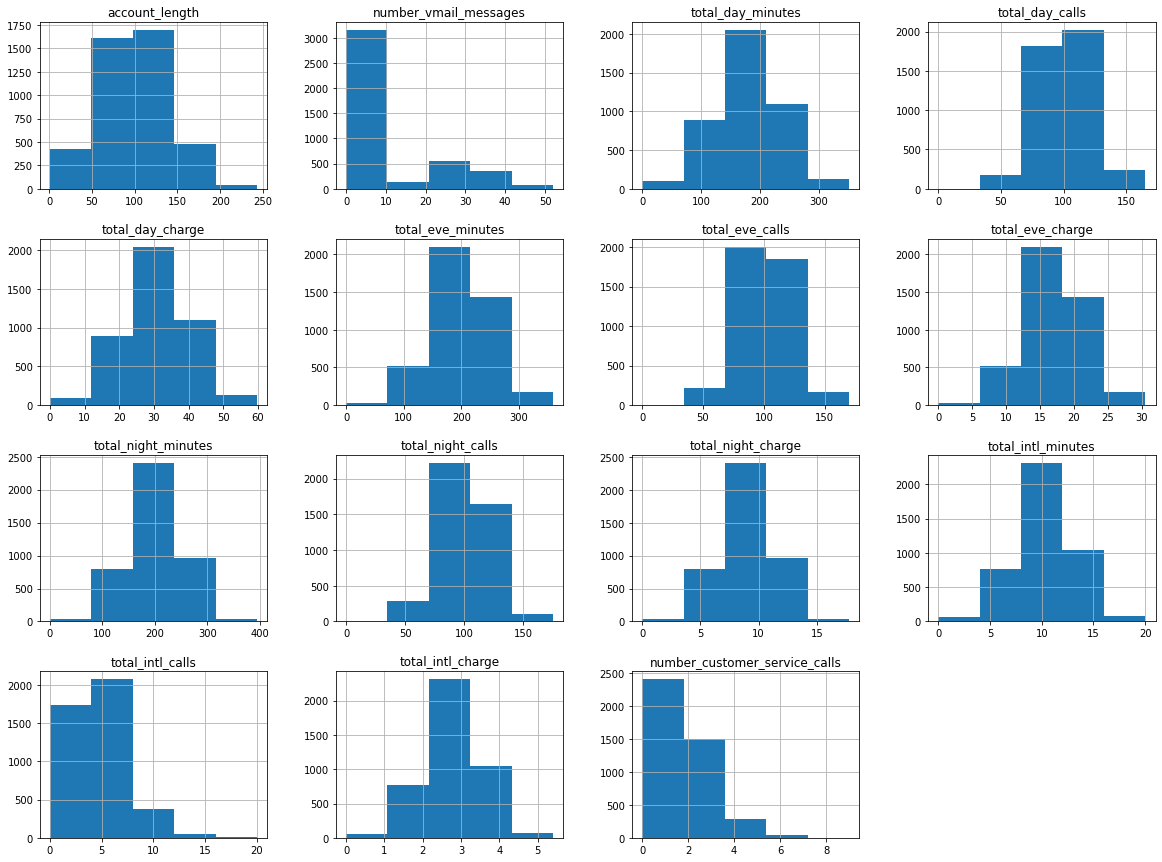

In [ ]:
df.hist(bins=5,figsize=(20,15))
plt.show()

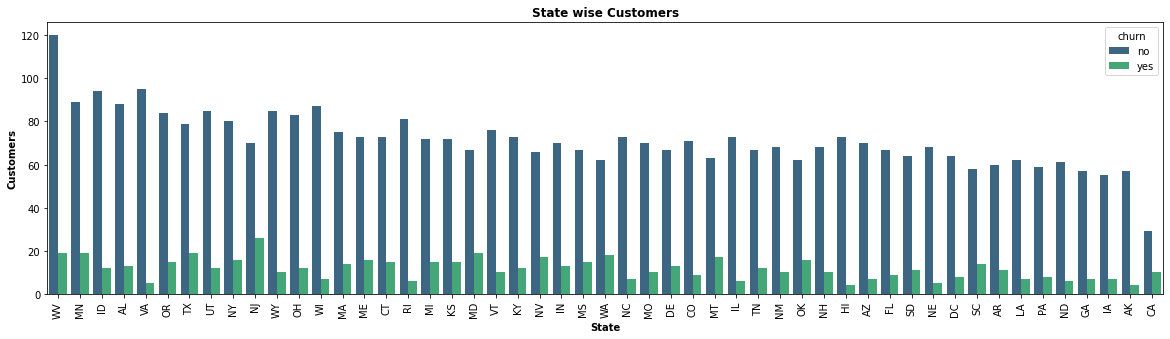

In [ ]:
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(data = df, x='state', order=df['state'].value_counts().index, palette='viridis', hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('State wise Customers', fontsize=12, fontweight='bold')
plt.show()

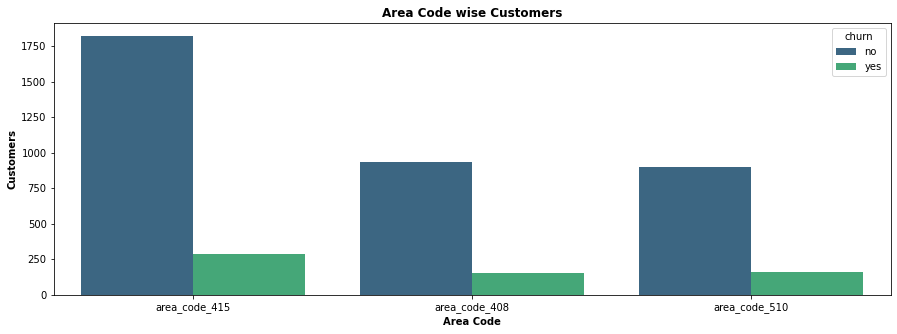

In [ ]:
fig2, ax=plt.subplots(figsize=(15,5))
sns.countplot(data = df, x='area_code', order=df['area_code'].value_counts().index, palette='viridis', hue='churn')
plt.xlabel('Area Code', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Area Code wise Customers', fontsize=12, fontweight='bold')
plt.show()

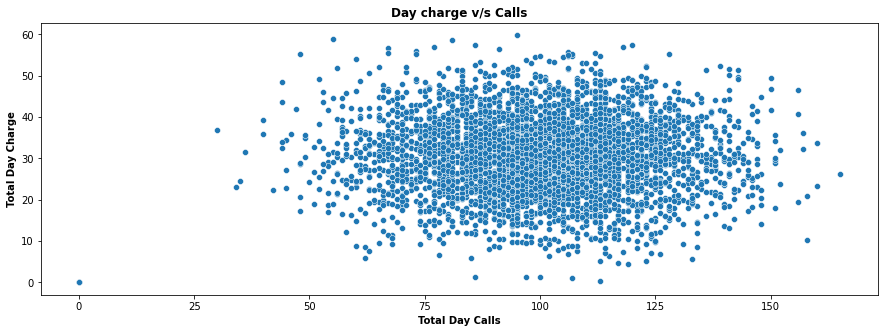

In [ ]:
fig3, ax=plt.subplots(figsize=(15,5))
sns.scatterplot(data = df, x='total_day_calls',y='total_day_charge' , palette='viridis')
plt.xlabel('Total Day Calls', fontsize=10, fontweight='bold')
plt.ylabel('Total Day Charge', fontsize=10, fontweight='bold')
plt.title('Day charge v/s Calls', fontsize=12, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features ')

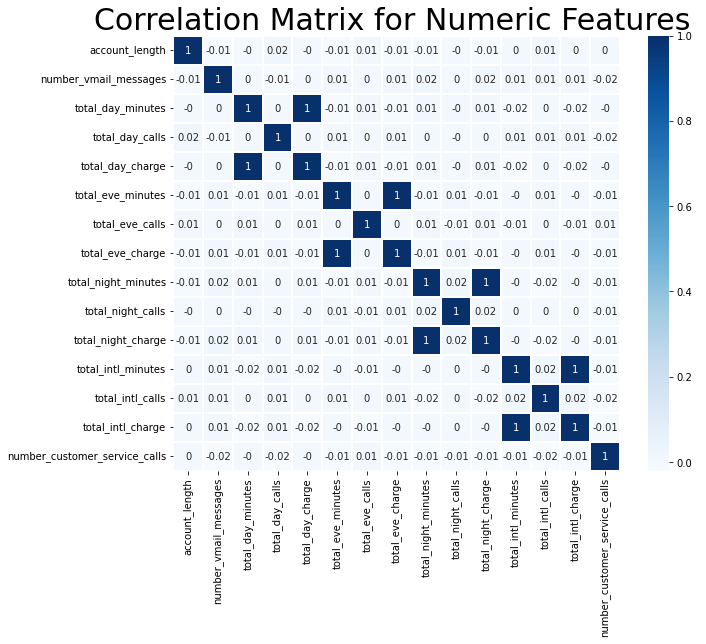

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', linewidths=1, )
plt.title("Correlation Matrix for Numeric Features ", size=30)

# Data Preparation

In [ ]:
df['churn'].replace({'no': 0, 'yes': 1}, inplace=True)
df['international_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
df['voice_mail_plan'].replace({'no': 0, 'yes': 1}, inplace=True)

df.drop(columns=['state', 'area_code'], inplace=True)

df['minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['calls_cnt'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

df.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
df.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], inplace=True)
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)

df.drop(columns=['total_intl_minutes', 'total_intl_calls'], inplace=True)

df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,churn,minutes,calls_cnt,total_charge
0,107,0,1,26,3.70,1,0,611.5,329,55.54
1,137,0,0,0,3.29,0,0,527.2,328,59.00
2,84,1,0,0,1.78,2,0,558.2,248,65.02
3,75,1,0,0,2.73,3,0,501.9,356,49.36
4,121,0,1,24,2.03,3,0,779.3,314,76.28


In [ ]:
df.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
minutes                          0
calls_cnt                        0
total_charge                     0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,churn,minutes,calls_cnt,total_charge
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,2.769654,1.559059,0.140706,580.961388,299.923294,56.683586
std,39.698401,0.290714,0.439583,13.439882,0.745204,1.311434,0.347759,88.823648,34.405153,10.334156
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000,188.000000,19.980000
25%,73.000000,0.000000,0.000000,0.000000,2.300000,1.000000,0.000000,521.125000,277.000000,49.592500
50%,100.000000,0.000000,0.000000,0.000000,2.780000,1.000000,0.000000,581.400000,300.000000,56.680000
75%,127.000000,0.000000,1.000000,16.000000,3.240000,2.000000,0.000000,640.900000,323.000000,63.447500
max,243.000000,1.000000,1.000000,52.000000,5.400000,9.000000,1.000000,876.900000,410.000000,92.560000


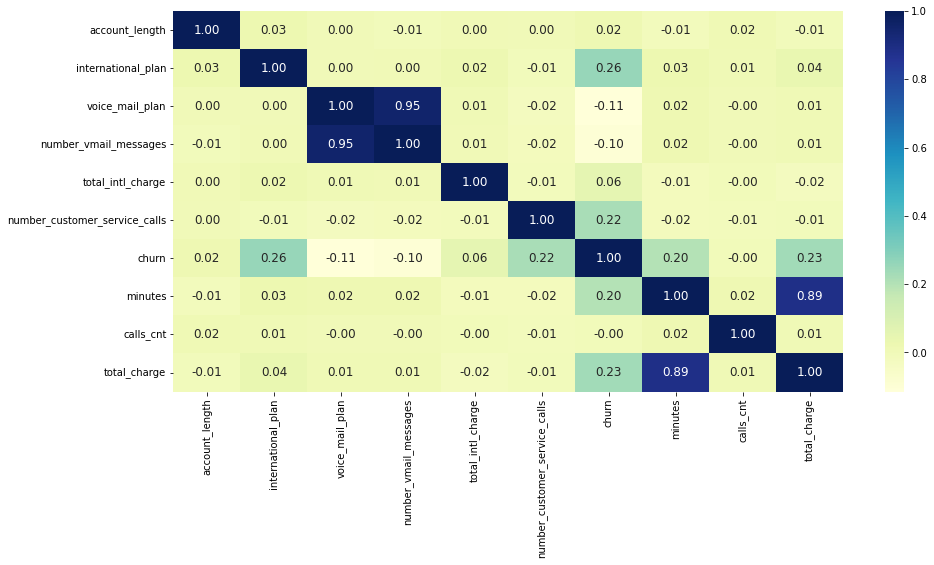

In [ ]:
corr = df.corr()
fig4, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,cmap="YlGnBu",annot_kws={'size': 12},fmt=".2f")

In [ ]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,test_size=0.20,random_state=1)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4250
Total # of sample in train dataset: 3400
Total # of sample in test dataset: 850


# Modelling

In [ ]:
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['ET','RFC','DC','AB','SVC','GNB'])

### ExtraTreesClassifier

In [ ]:
ET = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
ET.fit(X_train, y_train)

models.loc['train_acc','ET'] =accuracy_score(y_train, ET.predict(X_train))

In [ ]:
ET_pred = ET.predict(X_test)

In [ ]:
accuracy_score(y_test, ET_pred)

0.9529411764705882

In [ ]:
ET_cr = classification_report(y_test, ET_pred, output_dict=True)
pd.DataFrame(ET_cr).transpose()

,precision,recall,f1-score,support
0,0.962517,0.983584,0.972936,731.000000
1,0.883495,0.764706,0.819820,119.000000
accuracy,0.952941,0.952941,0.952941,0.952941
macro avg,0.923006,0.874145,0.896378,850.000000
weighted avg,0.951454,0.952941,0.951500,850.000000


### RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RFC.fit(X_train,y_train)
models.loc['train_acc','RFC']=accuracy_score(y_train, RFC.predict(X_train))

In [ ]:
RFC_pred = RFC.predict(X_test)

In [ ]:
accuracy_score(y_test, RFC_pred)

0.9611764705882353

In [ ]:
RFC_cr = classification_report(y_test, RFC_pred, output_dict=True)
pd.DataFrame(RFC_cr).transpose()

,precision,recall,f1-score,support
0,0.966578,0.989056,0.977688,731.000000
1,0.921569,0.789916,0.850679,119.000000
accuracy,0.961176,0.961176,0.961176,0.961176
macro avg,0.944073,0.889486,0.914183,850.000000
weighted avg,0.960276,0.961176,0.959906,850.000000


### DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
DT.fit(X_train, y_train)
models.loc['train_acc','DecisionTree'] = accuracy_score(y_train, DT.predict(X_train))

In [ ]:
DT_pred = DT.predict(X_test)

In [ ]:
accuracy_score(y_test, DT_pred)

0.9411764705882353

In [ ]:
DT_cr = classification_report(y_test, DT_pred, output_dict=True)
pd.DataFrame(DT_cr).transpose()

,precision,recall,f1-score,support
0,0.967078,0.964432,0.965753,731.000000
1,0.785124,0.798319,0.791667,119.000000
accuracy,0.941176,0.941176,0.941176,0.941176
macro avg,0.876101,0.881376,0.878710,850.000000
weighted avg,0.941605,0.941176,0.941381,850.000000


### AdaBoostClassifier

In [ ]:
AB = AdaBoostClassifier(n_estimators=100,  random_state=0)
AB.fit(X_train, y_train)
models.loc['train_acc','AdaBoost'] = accuracy_score(y_train, AB.predict(X_train))

In [ ]:
AB_pred = AB.predict(X_test)

In [ ]:
accuracy_score(y_test, AB_pred)

0.9247058823529412

In [ ]:
AB_cr = classification_report(y_test, AB_pred, output_dict=True)
pd.DataFrame(AB_cr).transpose()

,precision,recall,f1-score,support
0,0.939394,0.975376,0.957047,731.000000
1,0.802198,0.613445,0.695238,119.000000
accuracy,0.924706,0.924706,0.924706,0.924706
macro avg,0.870796,0.794411,0.826143,850.000000
weighted avg,0.920186,0.924706,0.920394,850.000000


### SVC

In [ ]:
SVC=SVC()
SVC.fit(X_train,y_train)
models.loc['train_acc','SVC']=accuracy_score(y_train,SVC.predict(X_train))

In [ ]:
SVC_pred = SVC.predict(X_test)

In [ ]:
accuracy_score(y_test, SVC_pred)

0.86

In [ ]:
SVC_cr = classification_report(y_test, SVC_pred, output_dict=True)
pd.DataFrame(SVC_cr).transpose()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.8600,1.00,0.924731,731.00
1,0.0000,0.00,0.000000,119.00
accuracy,0.8600,0.86,0.860000,0.86
macro avg,0.4300,0.50,0.462366,850.00
weighted avg,0.7396,0.86,0.795269,850.00


### GaussianNB

In [ ]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
models.loc['train_acc','GNB']=accuracy_score(y_train,GNB.predict(X_train))

In [ ]:
GNB_pred = GNB.predict(X_test)

In [ ]:
accuracy_score(y_test, GNB_pred)

0.8705882352941177

In [ ]:
GNB_cr = classification_report(y_test, GNB_pred, output_dict=True)
pd.DataFrame(GNB_cr).transpose()

,precision,recall,f1-score,support
0,0.927098,0.922025,0.924554,731.000000
1,0.536585,0.554622,0.545455,119.000000
accuracy,0.870588,0.870588,0.870588,0.870588
macro avg,0.731842,0.738323,0.735004,850.000000
weighted avg,0.872426,0.870588,0.871480,850.000000


### Dataframe Accuracy

In [ ]:
# Buat variabel acc yang isinya adalah dataframe nilai acc data train dan test pada masing-masing algoritma
acc = pd.DataFrame(columns=['train', 'test'], index=['ExtraTreesClassifier','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier','SVC','GaussianNB'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'ExtraTreesClassifier':ET,'RandomForestClassifier':RFC,'DecisionTreeClassifier':DT,'AdaBoostClassifier':AB,'SVC':SVC,'GaussianNB':GNB}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train)).round(15)*100
    acc.loc[name, 'test'] =accuracy_score(y_true=y_test, y_pred=model.predict(X_test)).round(15)*100

acc

,train,test
ExtraTreesClassifier,100.0,95.294118
RandomForestClassifier,99.264706,96.117647
DecisionTreeClassifier,100.0,94.117647
AdaBoostClassifier,92.911765,92.470588
SVC,85.911765,86.0
GaussianNB,87.529412,87.058824


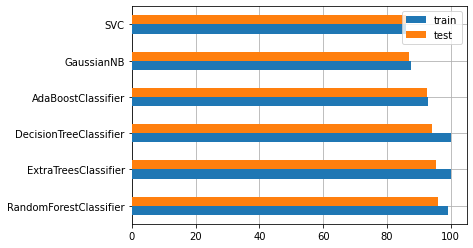

In [ ]:
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# Evaluasi

In [ ]:
prediksi = X_test.iloc[5:6].copy()
pred_dict = {'y_true':y_test[5:6]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_ExtraTreesClassifier,prediksi_RandomForestClassifier,prediksi_DecisionTreeClassifier,prediksi_AdaBoostClassifier,prediksi_SVC,prediksi_GaussianNB
1195,0,0,0,0,0,0,0


In [ ]:
prediksi

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,minutes,calls_cnt,total_charge
1195,103,0,0,0,2.08,1,526.9,290,52.23
